This notebook is to show the variability of the EUV intensity in AIA images

In [112]:
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import numpy as np
import pandas as pd
from sunpy.sun import constants as const
import astropy.units as u
from sunpy.net import Fido
from sunpy.net import attrs as a
from astropy.coordinates import SkyCoord
from sunpy.coordinates import Helioprojective
import matplotlib.pyplot as plt
import sunpy.map
from sunpy.coordinates import RotatedSunFrame
from sunpy.coordinates import frames, get_body_heliographic_stonyhurst, get_horizons_coord
from matplotlib.patches import ConnectionPatch
import matplotlib
import numpy as np
import astropy.io.fits as fits
from astropy.visualization import ImageNormalize, PercentileInterval, SqrtStretch
from aiapy.calibrate import normalize_exposure, register, update_pointing

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

In [132]:
year = '2021'
month = '09'
day = '18'
channel = 94

# Load AIA data
aia_files = sorted(glob.glob(f'./AIA/*{channel}*_{year}_{month}_{day}*.fits'))
print(len(aia_files))

1440


In [133]:
# load and calibrate the AIA map
aiamap = sunpy.map.Map(aia_files[0])
aiamap_updated_pointing = update_pointing(aiamap)
aiamap_registered = register(aiamap_updated_pointing)
aiamap_normalized = normalize_exposure(aiamap_registered)

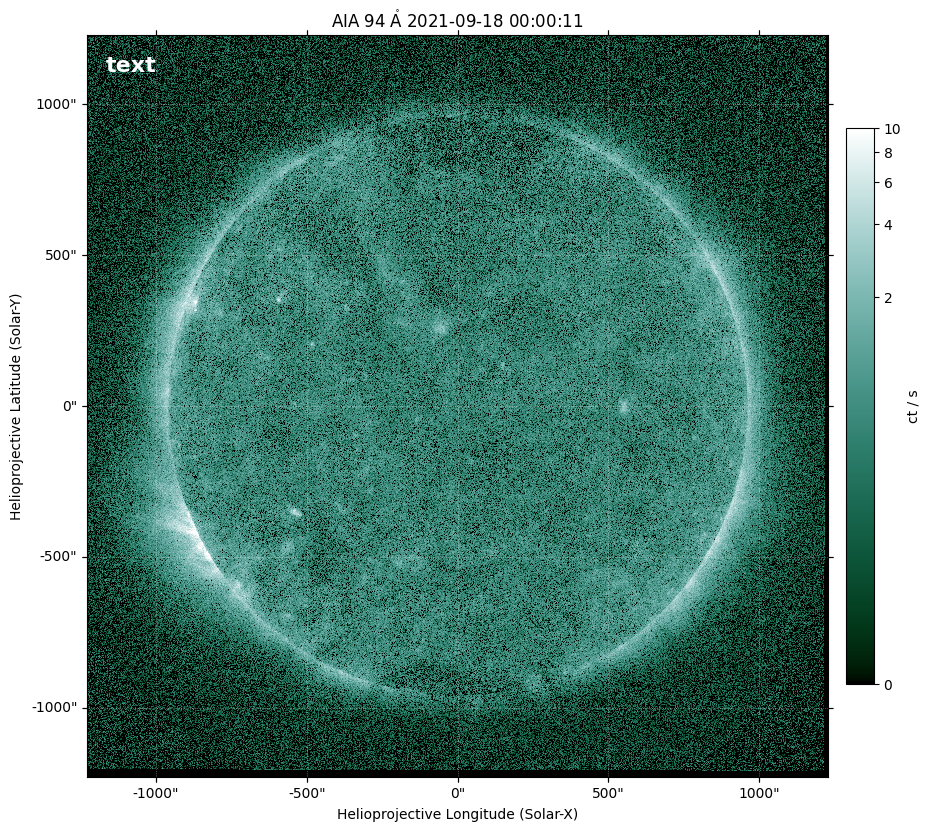

In [149]:
# plot the AIA map
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection=aiamap_normalized)
im = aiamap_normalized.plot(axes=ax,
                            vmin=0,
                            vmax=10
                           )
ax.text(100, aiamap_normalized.data.shape[1]-200, 'text', color='white', fontsize=16, fontweight='bold')
plt.colorbar(im, shrink=0.6, pad=0.02, label=aiamap_normalized.meta['bunit'])
fig.tight_layout()
plt.show()

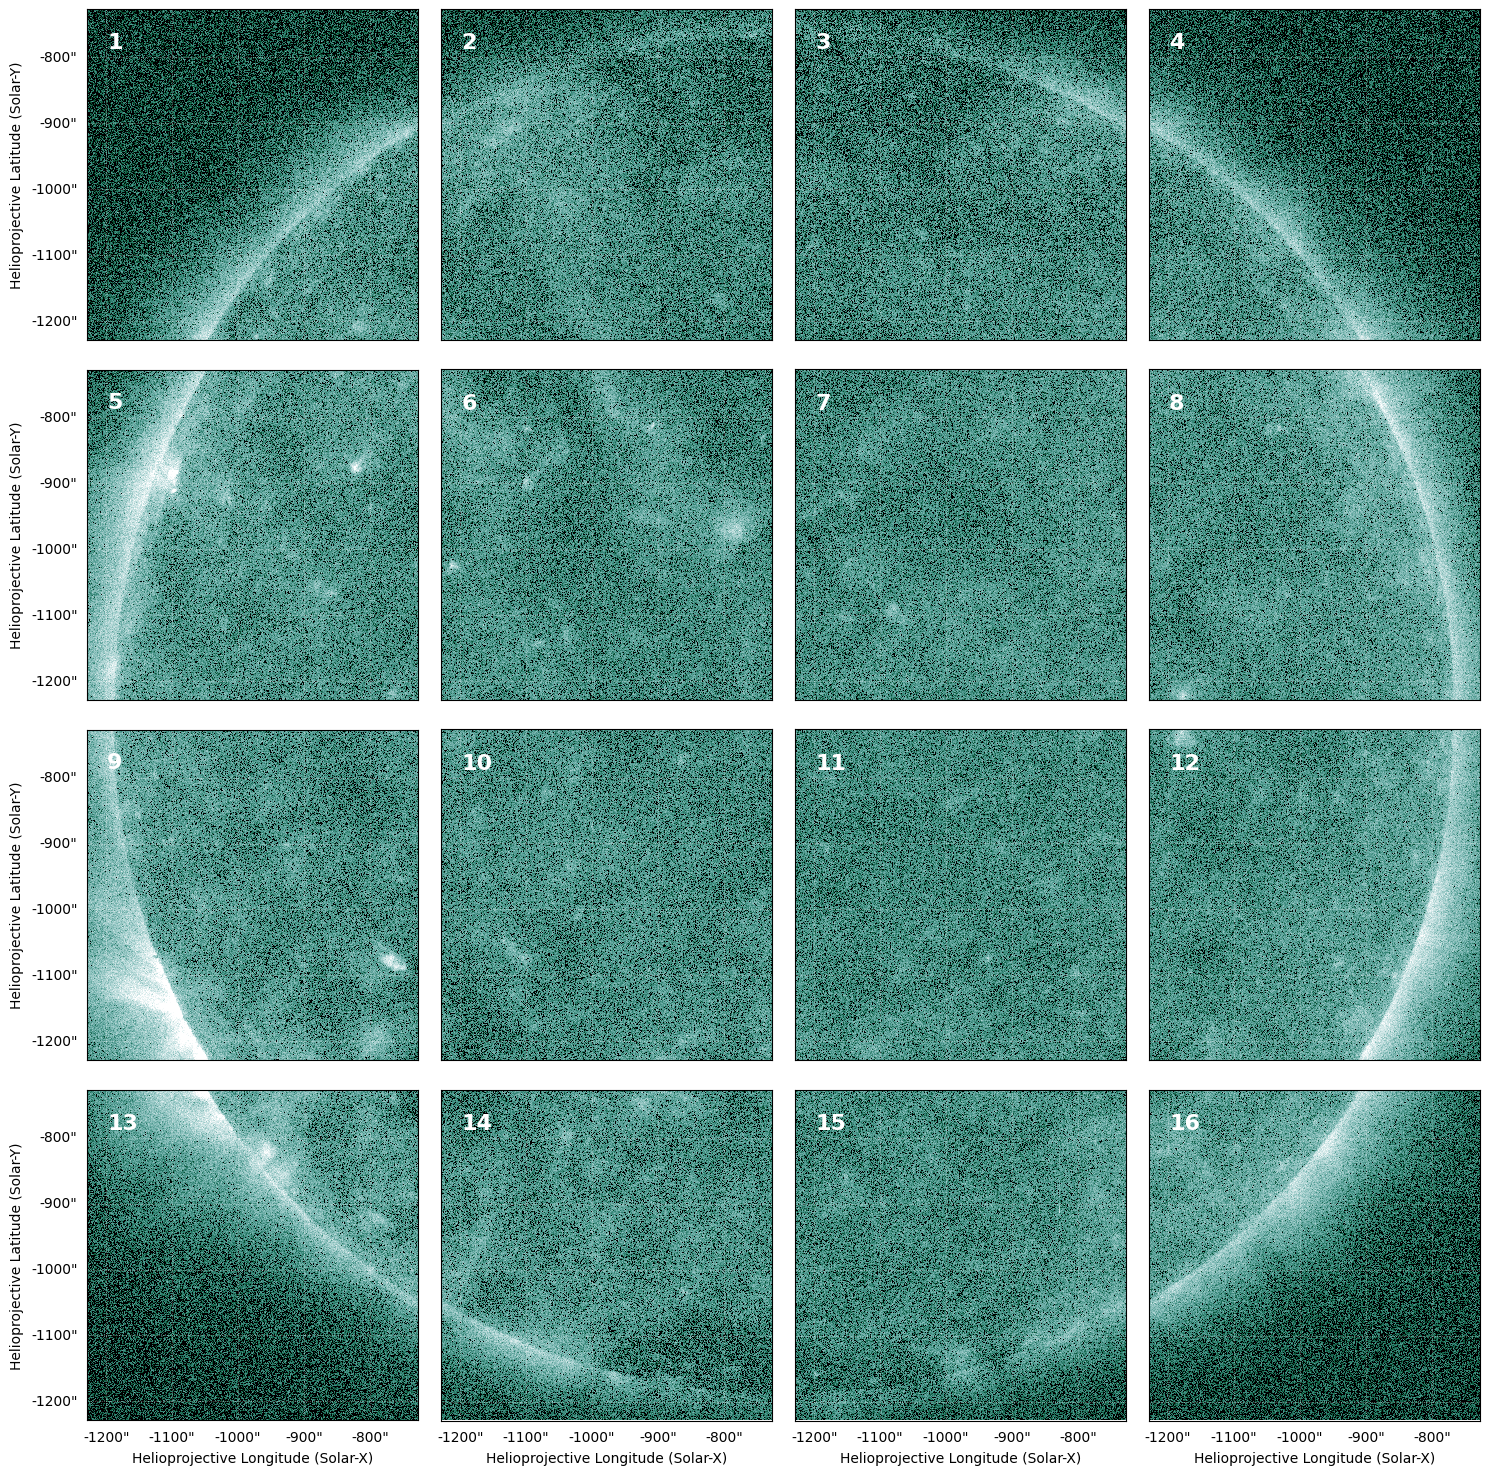

In [152]:
# Divide the solar disk into segments
fig = plt.figure(figsize=[15,15])
max_range = 20
# ============================ FIRST ROW =====================================================

ax = fig.add_subplot(4,4,1, projection=aiamap_normalized)
top_right = SkyCoord(-500*u.arcsec, 1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(-1000*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
# ax.grid()
# ax.coords[0].frame.set_linewidth(0)
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
# ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '1', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,2, projection=aiamap_normalized)
top_right = SkyCoord(0*u.arcsec, 1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(-500*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '2', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,3, projection=aiamap_normalized)
top_right = SkyCoord(500*u.arcsec, 1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(0*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '3', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,4, projection=aiamap_normalized)
top_right = SkyCoord(1000*u.arcsec, 1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(500*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '4', color='white', fontsize=16, fontweight='bold')

# ============================ SECOND ROW =====================================================

ax = fig.add_subplot(4,4,5, projection=aiamap_normalized)
top_right = SkyCoord(-500*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(-1000*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '5', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,6, projection=aiamap_normalized)
top_right = SkyCoord(0*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(-500*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '6', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,7, projection=aiamap_normalized)
top_right = SkyCoord(500*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(0*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '7', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,8, projection=aiamap_normalized)
top_right = SkyCoord(1000*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(500*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '8', color='white', fontsize=16, fontweight='bold')

# ============================ THIRD ROW =====================================================

ax = fig.add_subplot(4,4,9, projection=aiamap_normalized)
top_right = SkyCoord(-500*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(-1000*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '9', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,10, projection=aiamap_normalized)
top_right = SkyCoord(0*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(-500*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '10', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,11, projection=aiamap_normalized)
top_right = SkyCoord(500*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(0*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '11', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,12, projection=aiamap_normalized)
top_right = SkyCoord(1000*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(500*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '12', color='white', fontsize=16, fontweight='bold')

# ============================ FOURTH ROW =====================================================

ax = fig.add_subplot(4,4,13, projection=aiamap_normalized)
top_right = SkyCoord(-500*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(-1000*u.arcsec, -1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
# ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '13', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,14, projection=aiamap_normalized)
top_right = SkyCoord(0*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(-500*u.arcsec, -1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
# ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '14', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,15, projection=aiamap_normalized)
top_right = SkyCoord(500*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(0*u.arcsec, -1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
# ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '15', color='white', fontsize=16, fontweight='bold')

ax = fig.add_subplot(4,4,16, projection=aiamap_normalized)
top_right = SkyCoord(1000*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
bottom_left = SkyCoord(500*u.arcsec, -1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
aia_sub = aiamap.submap(bottom_left, top_right=top_right)
aia_sub.plot(axes=ax, vmin=0, vmax=max_range)
ax.set_title('')
ax.coords[0].set_ticks_visible(False)
# ax.coords[0].set_ticklabel_visible(False)
ax.coords[1].set_ticks_visible(False)
ax.coords[1].set_ticklabel_visible(False)
ax.text(50, aia_sub.data.shape[1]-100, '16', color='white', fontsize=16, fontweight='bold')

fig.tight_layout()
fig.savefig(f'./plots/AIA_{channel}_segments_{year}{month}{day}.png', format='png', bbox_inches='tight')
plt.show()

In [ ]:
# Initialize an empty list to store dictionaries
data = []

for i, file in enumerate(aia_files):
    print(f"{i} \t Working on {file.split('/')[-1]} ...")

    # load and calibrate the AIA map
    aiamap = sunpy.map.Map(file)
    aiamap_updated_pointing = update_pointing(aiamap)
    aiamap_registered = register(aiamap_updated_pointing)
    aiamap_normalized = normalize_exposure(aiamap_registered)

    # Divide the solar disk into segments
    top_right = SkyCoord(-500*u.arcsec, 1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(-1000*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub1 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(0*u.arcsec, 1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(-500*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub2 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(500*u.arcsec, 1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(0*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub3 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(1000*u.arcsec, 1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(500*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub4 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(-500*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(-1000*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub5 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(0*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(-500*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub6 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(500*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(0*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub7 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(1000*u.arcsec, 500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(500*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub8 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(-500*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(-1000*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub9 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(0*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(-500*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub10 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(500*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(0*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub11 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(1000*u.arcsec, 0*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(500*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub12 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(-500*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(-1000*u.arcsec, -1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub13 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(0*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(-500*u.arcsec, -1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub14 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(500*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(0*u.arcsec, -1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub15 = aiamap.submap(bottom_left, top_right=top_right)

    top_right = SkyCoord(1000*u.arcsec, -500*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    bottom_left = SkyCoord(500*u.arcsec, -1000*u.arcsec, frame=aiamap_normalized.coordinate_frame)
    aia_sub16 = aiamap.submap(bottom_left, top_right=top_right)

    int_dict = {
        'datetime': aiamap_normalized.meta['date-obs'].replace('T', ' '),
        'avg_int_seg1': np.nanmean(aia_sub1.data),
        'avg_int_seg2': np.nanmean(aia_sub2.data),
        'avg_int_seg3': np.nanmean(aia_sub3.data),
        'avg_int_seg4': np.nanmean(aia_sub4.data),
        'avg_int_seg5': np.nanmean(aia_sub5.data),
        'avg_int_seg6': np.nanmean(aia_sub6.data),
        'avg_int_seg7': np.nanmean(aia_sub7.data),
        'avg_int_seg8': np.nanmean(aia_sub8.data),
        'avg_int_seg9': np.nanmean(aia_sub9.data),
        'avg_int_seg10': np.nanmean(aia_sub10.data),
        'avg_int_seg11': np.nanmean(aia_sub11.data),
        'avg_int_seg12': np.nanmean(aia_sub12.data),
        'avg_int_seg13': np.nanmean(aia_sub13.data),
        'avg_int_seg14': np.nanmean(aia_sub14.data),
        'avg_int_seg15':np.nanmean(aia_sub15.data),
        'avg_int_seg16': np.nanmean(aia_sub16.data)
    }

    # Append dictionary to the list
    data.append(int_dict)

df_data = pd.DataFrame(data)
df_data.to_csv('.//mean_intensities_segments_193a.csv')

In [80]:
df = pd.read_csv('/home/mnedal/DIAS/mean_intensities_segments_193a.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

avg_int_seg1  avg_int_seg2  avg_int_seg3  \
datetime                                                            
2021-09-18 00:00:04.840    135.490237    148.601756    125.093745   
2021-09-18 00:01:04.840    135.539532    148.578173    125.098753   
2021-09-18 00:02:04.840    135.478858    148.625987    125.119924   
2021-09-18 00:03:04.840    135.420949    148.666108    125.126901   
2021-09-18 00:04:04.840    135.400151    148.688893    125.180735   

                         avg_int_seg4  avg_int_seg5  avg_int_seg6  \
datetime                                                            
2021-09-18 00:00:04.840    147.569754    321.341702    176.227785   
2021-09-18 00:01:04.840    147.559471    321.307323    176.301800   
2021-09-18 00:02:04.840    147.621079    321.094299    176.310749   
2021-09-18 00:03:04.840    147.557428    320.890511    176.430093   
2021-09-18 00:04:04.840    147.551029    320.724693    176.619266   

                         avg_int_seg7  avg_int_seg8  avg_int_seg9  \
datetime                                                            
2021-09-18 00:00:04.840    140.334502    256.507805    308.798601   
2021-09-18 00:01:04.840    140.336248    256.533826    308.777949   
2021-09-18 00:02:04.840    140.278372    256.576548    308.685916   
2021-09-18 00:03:04.840    140.293214    256.518666    308.790933   
2021-09-18 00:04:04.840    140.222379    256.469941    308.779191   

                         avg_int_seg10  avg_int_seg11  avg_int_seg12  \
datetime                                                               
2021-09-18 00:00:04.840     127.471089     109.689269     249.495437   
2021-09-18 00:01:04.840     127.580074     109.745268     249.606104   
2021-09-18 00:02:04.840     127.592306     109.773002     249.670763   
2021-09-18 00:03:04.840     127.534710     109.794697     249.851911   
2021-09-18 00:04:04.840     127.617257     109.754495     249.763993   

                         avg_int_seg13  avg_int_seg14  avg_int_seg15  \
datetime                                                               
2021-09-18 00:00:04.840     258.921207     181.417397     122.930027   
2021-09-18 00:01:04.840     258.935900     181.404987     122.891668   
2021-09-18 00:02:04.840     258.915373     181.305951     122.923087   
2021-09-18 00:03:04.840     258.893661     181.387639     122.882370   
2021-09-18 00:04:04.840     258.814980     181.451277     122.836197   

                         avg_int_seg16  
datetime                                
2021-09-18 00:00:04.840     211.310910  
2021-09-18 00:01:04.840     211.328891  
2021-09-18 00:02:04.840     211.288818  
2021-09-18 00:03:04.840     211.195526  
2021-09-18 00:04:04.840     211.098822

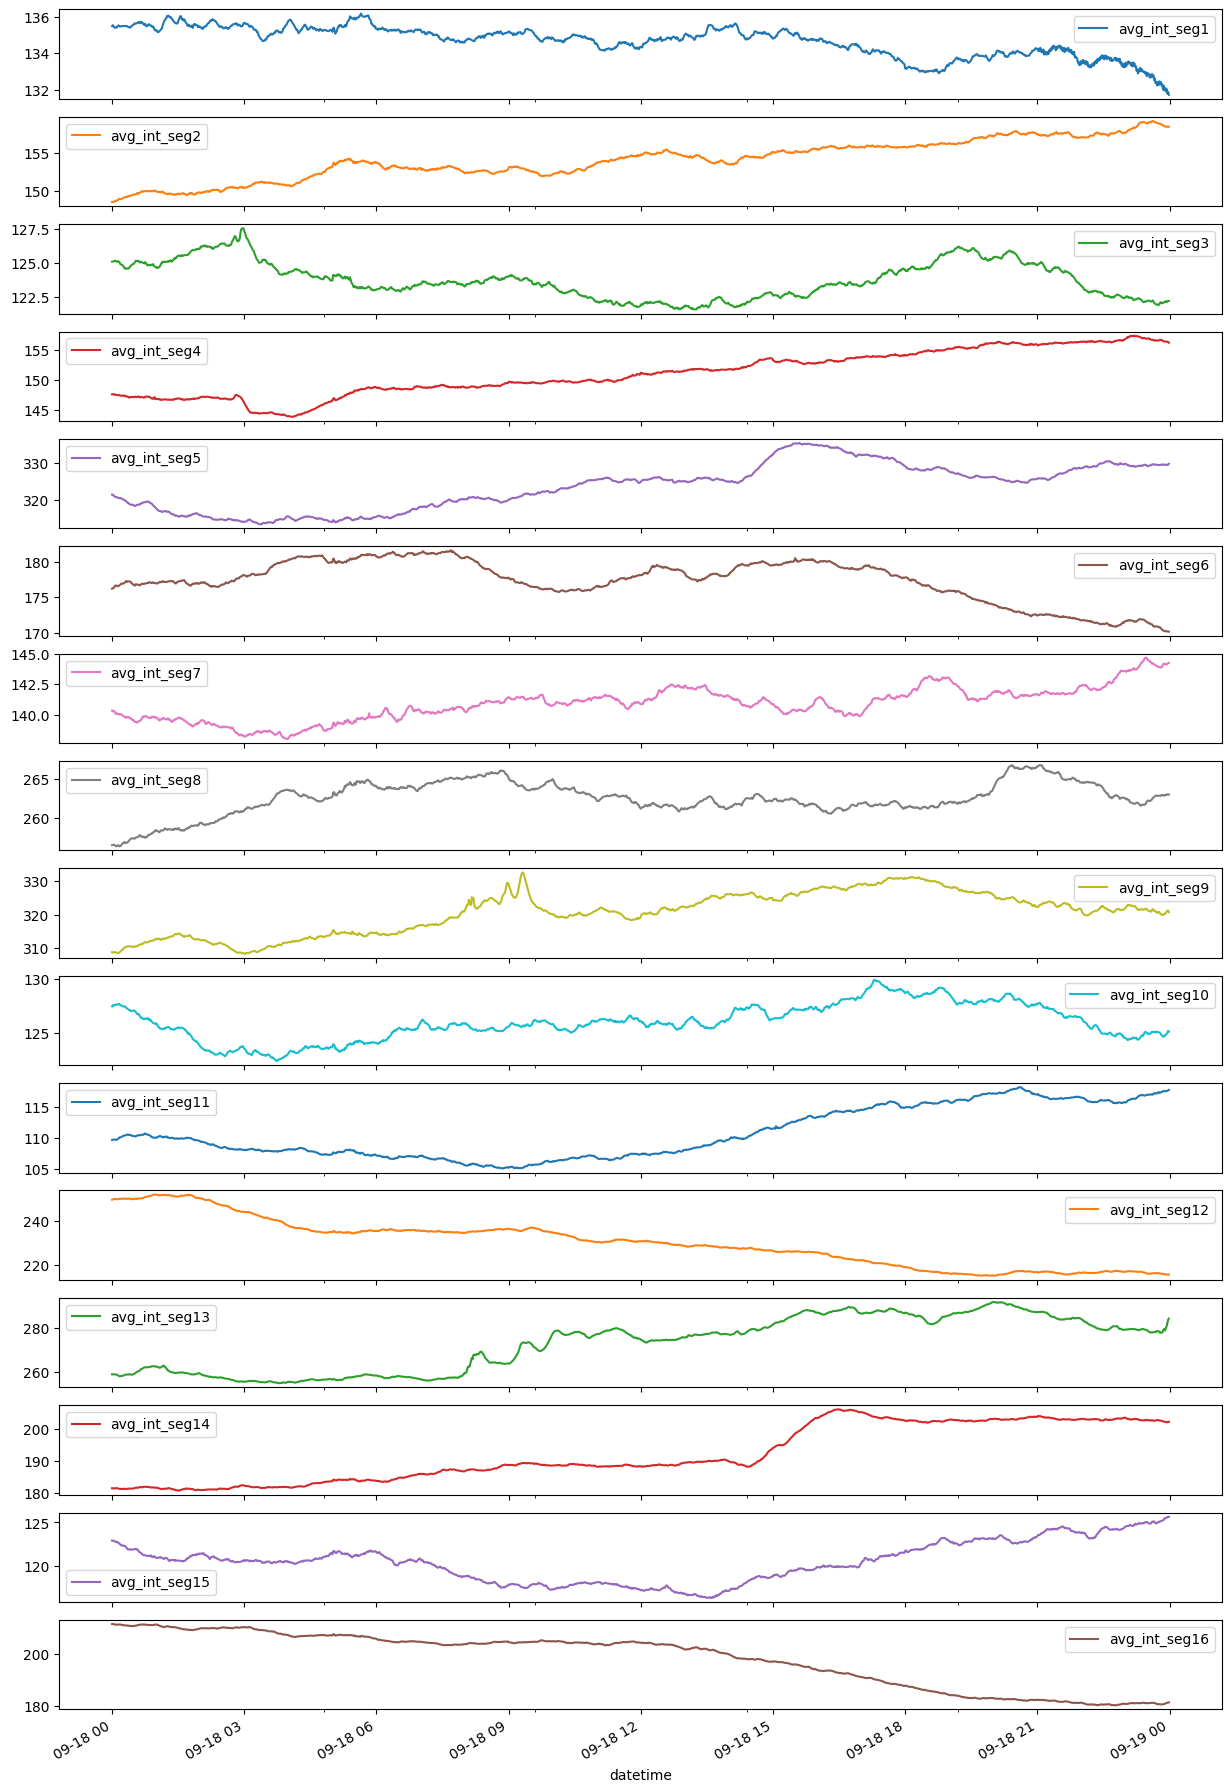

In [86]:
# Replace values meeting condition with NaN in all columns
df = df.applymap(lambda x: np.nan if x < 0.5 else x)

df.plot(subplots=True,
        figsize=[15,25],
#         logy=True
       )
plt.show()

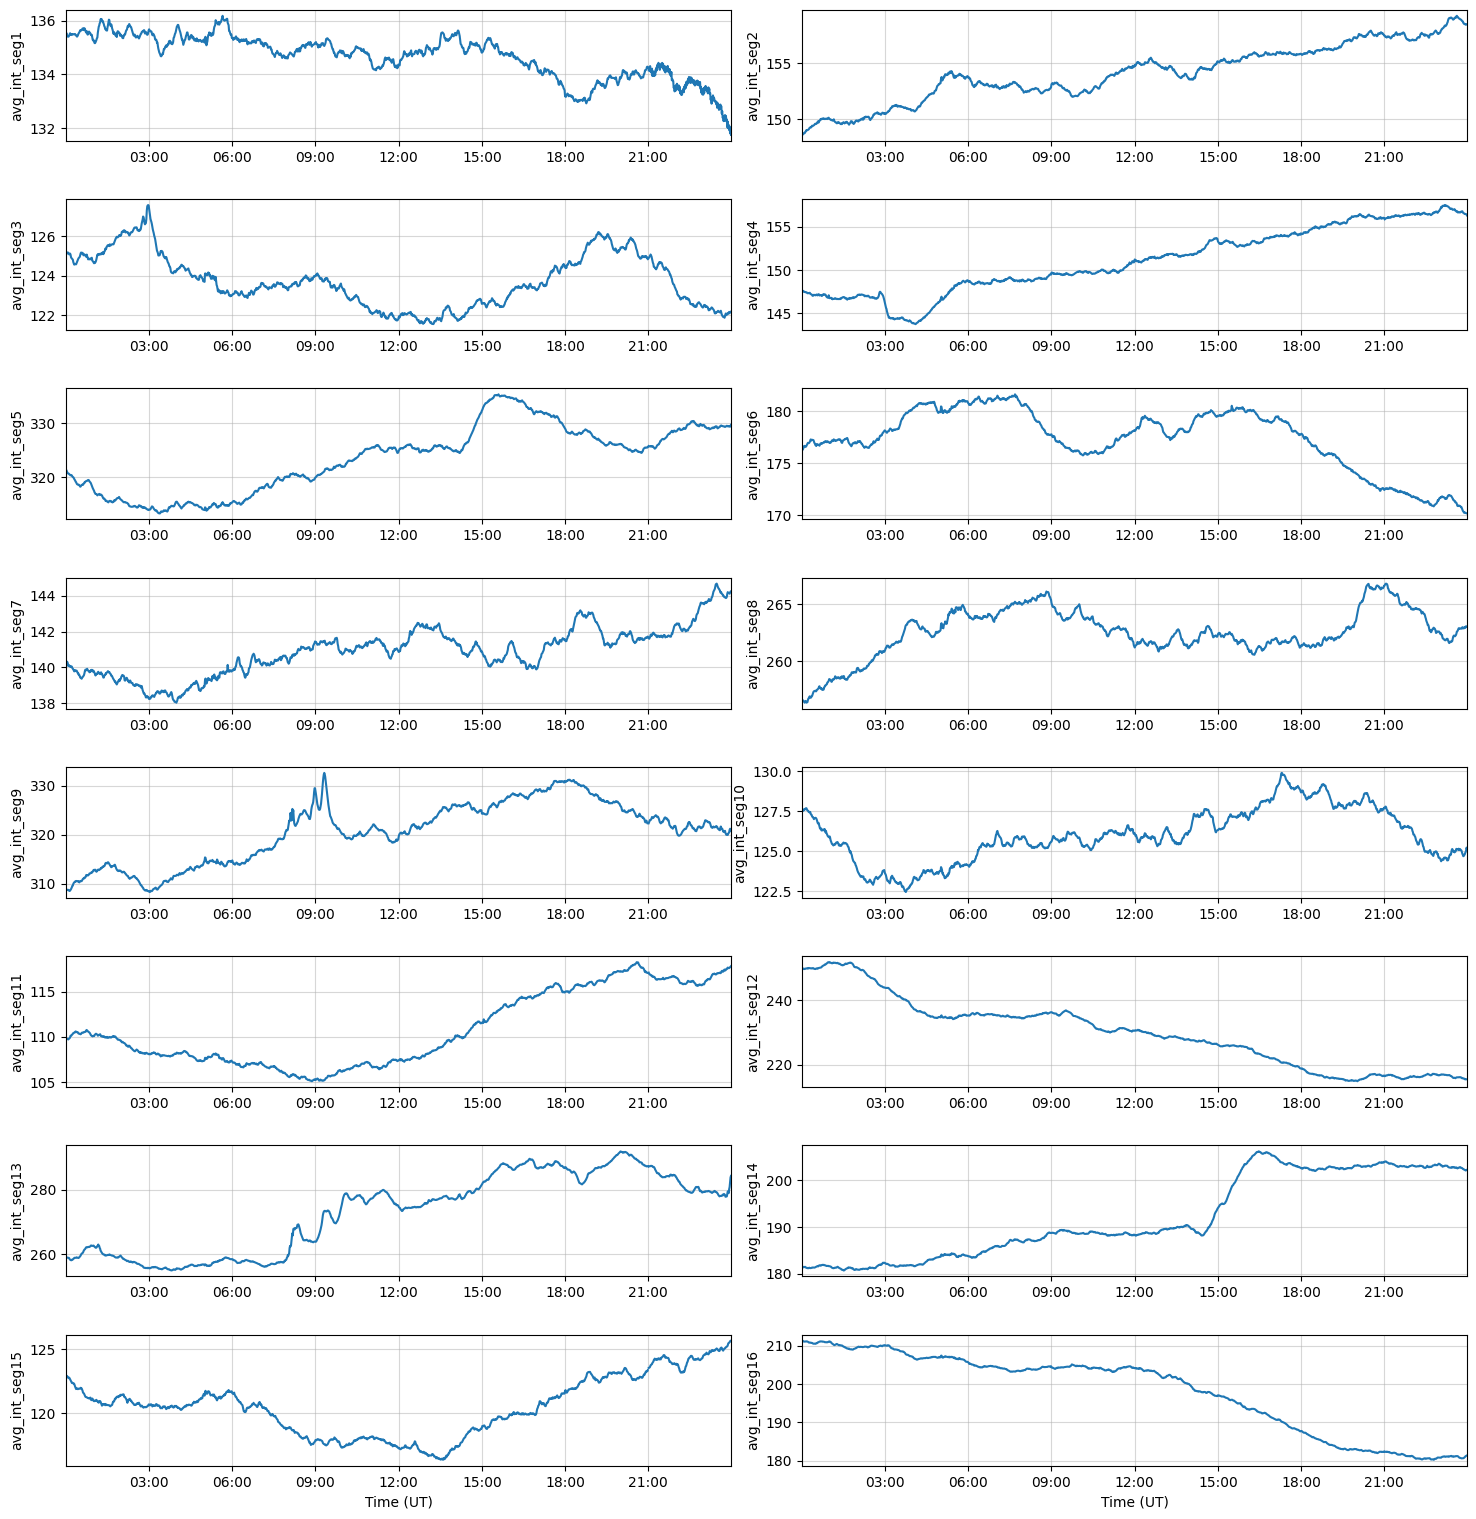

In [110]:
fig = plt.figure(figsize=[15,30])

for i, col in enumerate(df.columns):
    ax = fig.add_subplot(len(df.columns), 2, i+1)
    df[col].plot(ax=ax, rot=0)
    plt.xticks(ha='center')
    ax.set_xlim(left=df.index[0], right=df.index[-1])
#     ax.set_yscale('log')
    ax.grid(alpha=0.5)
    ax.set_ylabel(col)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

    if i == 14 or i == 15:
        ax.set_xlabel('Time (UT)')
    else:
        ax.set_xlabel(None)

fig.tight_layout()
fig.savefig(f'./plots/{channel}a_avg_int_segments_{year}{month}{day}.png', format='png', dpi=300, bbox_inches='tight')
plt.show()